In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'D:\KAGGLE DS\airplane\PlanePrice.csv')
data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [3]:
raw_data=data.copy()

In [4]:
raw_data.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [6]:
raw_data.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


<h1>Data Cleaning/Filteration</h1>

In [7]:
raw_data['Max speed Knots'].replace(to_replace='.92 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.85 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.76 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.755 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.70 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.737 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.71 Mach', value=0, inplace=True)
raw_data['Max speed Knots'].replace(to_replace='.64 Mach', value=0, inplace=True)
raw_data['HP or lbs thr ea engine'].replace(to_replace='1000 dry', value=0, inplace=True)
raw_data['HP or lbs thr ea engine'].replace(to_replace='940wet', value=0, inplace=True)
raw_data['All eng rate of climb'].replace(to_replace='940wet', value=0, inplace=True)
raw_data['All eng rate of climb'].replace(to_replace='1,030 w/3bld', value=0, inplace=True)
raw_data['Landing over 50ft'].replace(to_replace='Orig', value=0, inplace=True)
raw_data['Length ft/in'].replace(to_replace='Orig', value=0, inplace=True)
raw_data['Wing span ft/in'].replace(to_replace='Orig', value=0, inplace=True)
raw_data['Length ft/in'].replace(to_replace='N/C', value=0, inplace=True)
raw_data['Wing span ft/in'].replace(to_replace='N/C', value=0, inplace=True)
raw_data['Price'].replace(to_replace='nan', value=0, inplace=True)
raw_data['All eng rate of climb'].replace(to_replace='1,167 w/3bld', value=1167, inplace=True)
raw_data['All eng rate of climb'].replace(to_replace='1,030 w/3bld', value=1030, inplace=True)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [9]:
raw_data=raw_data.fillna(0) 
x=raw_data.iloc[:,10]
x.dtype

dtype('O')

In [10]:
x=x.tolist()
x=np.array(x)


In [11]:
x=[s.replace(',', '') for s in x]

In [12]:
for item in range(len(x)):
    x[item]=float(x[item])

In [13]:
x=np.array(x)
raw_data['Landing over 50ft']=x
raw_data['Landing over 50ft']

0       2050.0
1       1350.0
2       1300.0
3       1300.0
4       1220.0
        ...   
512    12050.0
513    11200.0
514    11200.0
515     9474.0
516     9000.0
Name: Landing over 50ft, Length: 517, dtype: float64

In [14]:
x=raw_data.iloc[:,11]
x.dtype

dtype('O')

In [15]:
x=x.tolist()
x=np.array(x)


In [16]:
x=[s.replace(',', '') for s in x]

In [17]:
for item in range(len(x)):
    x[item]=float(x[item])

In [18]:
x=np.array(x)
raw_data['Empty weight lbs']=x
raw_data['Empty weight lbs']

0      1180.0
1       820.0
2       810.0
3       800.0
4       740.0
        ...  
512    7856.0
513    6837.0
514    6389.0
515    5164.0
516    5018.0
Name: Empty weight lbs, Length: 517, dtype: float64

In [19]:
x=raw_data.iloc[:,12]
x.dtype

dtype('O')

In [20]:
x=x.tolist()
x=np.array(x)
x=[s.replace(',', '') for s in x]
x=[s.replace('/', '.') for s in x]


In [21]:
#x=x.tolist()
for item in range(len(x)):
    float(x[item])

In [22]:
raw_data['Length ft/in']=x

In [23]:
x=raw_data.iloc[:,13]
x.dtype

dtype('O')

In [24]:
x=x.tolist()
x=np.array(x)
x=[s.replace(',', '') for s in x]
x=[s.replace('/', '.') for s in x]


In [25]:
#x=x.tolist()
for item in range(len(x)):
    float(x[item])

In [26]:
raw_data['Wing span ft/in']=x

In [27]:
x=raw_data.iloc[:,14]
x.dtype

dtype('O')

In [28]:
x=x.tolist()
x=np.array(x)
x=[s.replace(',', '') for s in x]
x=[s.replace('/', '.') for s in x]

In [29]:
#x=x.tolist()
for item in range(len(x)):
    float(x[item])

In [30]:
raw_data['Range N.M.']=x

In [31]:
x=raw_data.iloc[:,7]
x.dtype

dtype('O')

In [32]:
x=x.tolist()
x=np.array(x)
x=[s.replace(',', '') for s in x]
x=[s.replace('/', '.') for s in x]

In [33]:
#x=x.tolist()
for item in range(len(x)):
    float(x[item])

In [34]:
raw_data['All eng rate of climb']=x

In [35]:
raw_data['Range N.M.']=raw_data['Range N.M.'].astype(float)
raw_data['Wing span ft/in']=raw_data['Wing span ft/in'].astype(float)
raw_data['Length ft/in']=raw_data['Length ft/in'].astype(float)
raw_data['All eng rate of climb']=raw_data['All eng rate of climb'].astype(float)
raw_data['Max speed Knots']=raw_data['Max speed Knots'].astype(float)

In [36]:
x=raw_data.iloc[:,2]
x.dtype

dtype('O')

In [37]:
x=x.tolist()
x=np.array(x)
x=[s.replace(',', '') for s in x]
x=[s.replace('/', '.') for s in x]

In [38]:
#x=x.tolist()
for item in range(len(x)):
    float(x[item])

In [39]:
raw_data['HP or lbs thr ea engine']=x

In [40]:
raw_data['HP or lbs thr ea engine']=raw_data['HP or lbs thr ea engine'].astype(float)
raw_data['Fuel gal/lbs']=raw_data['Fuel gal/lbs'].astype(float)

In [41]:
df=raw_data.copy()
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    float64
 3   Max speed Knots          517 non-null    float64
 4   Rcmnd cruise Knots       517 non-null    float64
 5   Stall Knots dirty        517 non-null    float64
 6   Fuel gal/lbs             517 non-null    float64
 7   All eng rate of climb    517 non-null    float64
 8   Eng out rate of climb    517 non-null    float64
 9   Takeoff over 50ft        517 non-null    float64
 10  Landing over 50ft        517 non-null    float64
 11  Empty weight lbs         517 non-null    float64
 12  Length ft/in             517 non-null    float64
 13  Wing span ft/in          517 non-null    float64
 14  Range N.M.               5

<h1>EDA</h1>

In [42]:
raw_data

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.3,37.5,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.7,36.1,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.5,35.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.5,35.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.5,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000.0,351.0,334.0,0.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.5,47.8,1879.0,4100000.0
513,100 Darter (S.L. Industries),Propjet,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.5,47.8,1722.0,3584000.0
514,520,Propjet,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.5,47.8,1515.0,3200000.0
515,2180,Propjet,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.8,42.8,1336.0,3240000.0


<h1>check for missing values</h1>

In [43]:
raw_data.isnull().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

<h1>checking and handling outliers</h1>

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
raw_data['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [45]:
raw_data['Engine Type']= raw_data['Engine Type'].str.title()

In [46]:
raw_data['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

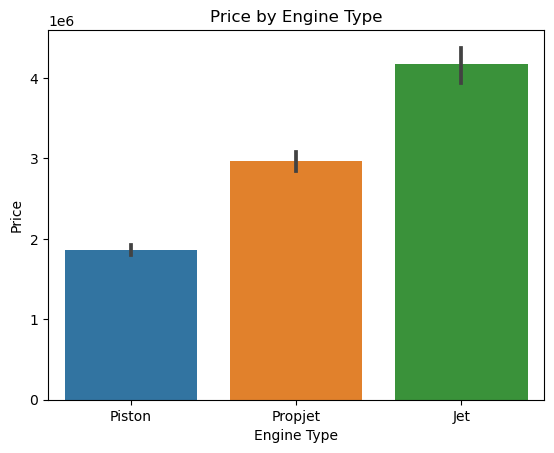

In [47]:
ax = sns.barplot(x='Engine Type', y='Price', data=raw_data)
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Price by Engine Type')
plt.show()

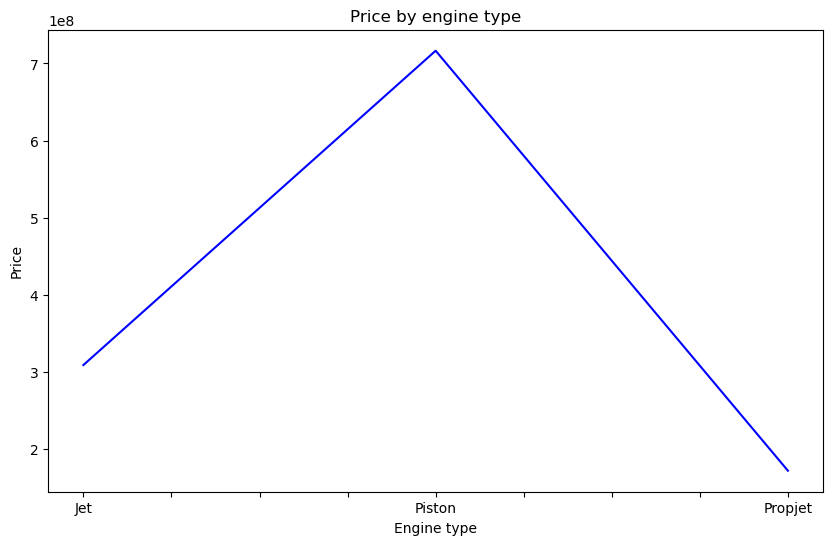

In [48]:
plt.figure(figsize=(10, 6))
raw_data.groupby('Engine Type')['Price'].sum().plot(color='blue')
plt.title('Price by engine type')
plt.xlabel('Engine type')
plt.ylabel('Price')
plt.show()

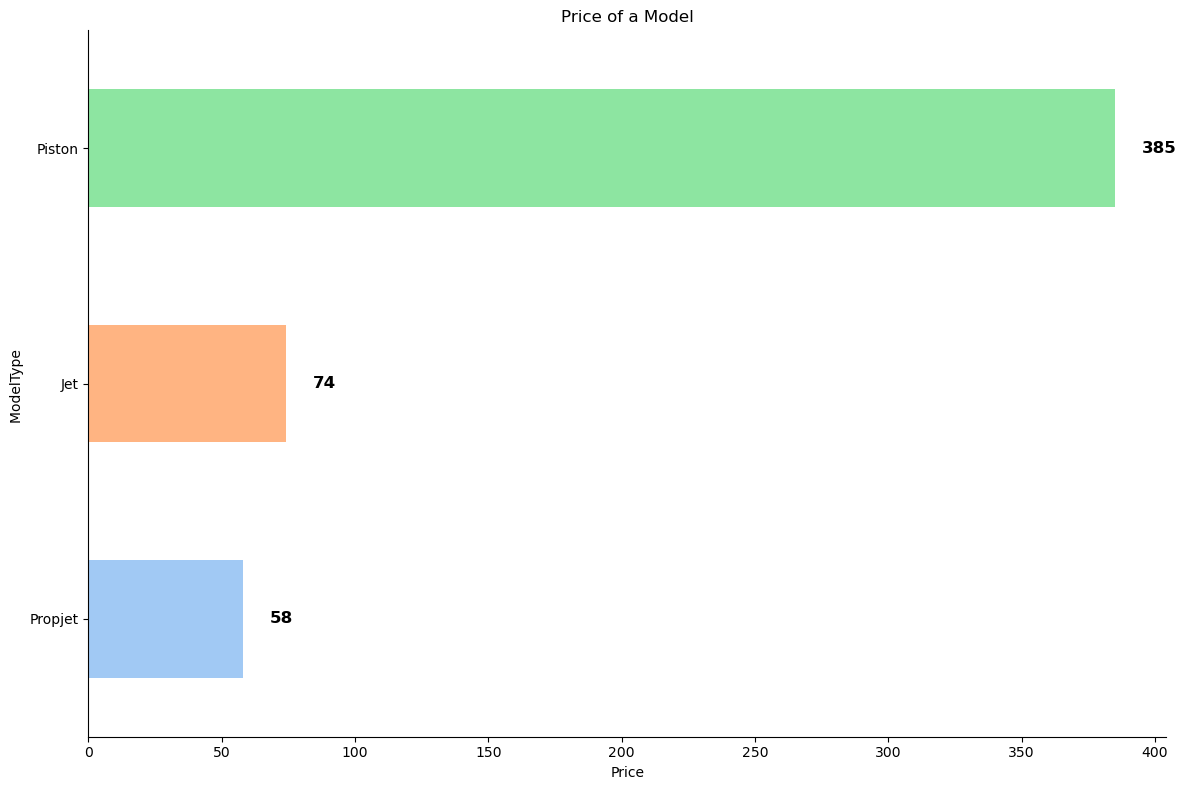

In [49]:
prices=raw_data.groupby('Engine Type')['Price'].count().sort_values()
plt.figure(figsize=(12, 8))

# Use Seaborn's color palette for better color choices
colors = sns.color_palette('pastel', len(prices))

prices.plot(kind='barh', color=colors)
plt.ylabel('ModelType ')
plt.xlabel('Price')
plt.title('Price of a Model')

# Add data labels to the right of each bar
for i, v in enumerate(prices):
    plt.text(v + 10, i, str(int(v)), color='black', va='center', fontsize=12, fontweight='bold')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
raw_data.columns

Index(['Model Name', 'Engine Type', 'HP or lbs thr ea engine',
       'Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty',
       'Fuel gal/lbs', 'All eng rate of climb', 'Eng out rate of climb',
       'Takeoff over 50ft', 'Landing over 50ft', 'Empty weight lbs',
       'Length ft/in', 'Wing span ft/in', 'Range N.M.', 'Price'],
      dtype='object')

max_speed=raw_data['Max speed Knots'].mean()
max_speed

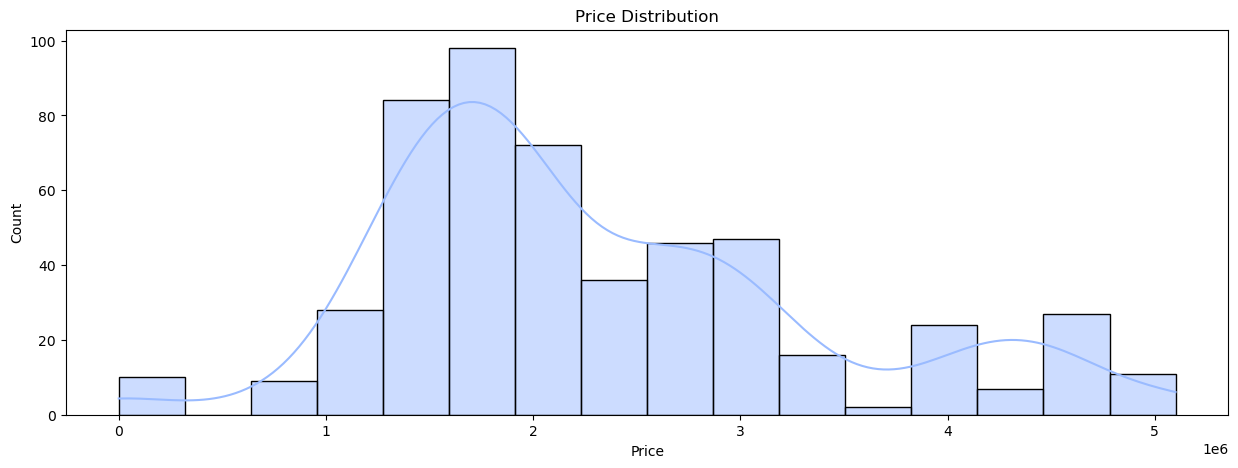

In [51]:
plt.figure(figsize=(15,5))
sns.histplot(data=raw_data, x="Price", kde=True, color=sns.color_palette("coolwarm")[1])
plt.title("Price Distribution")
plt.show()

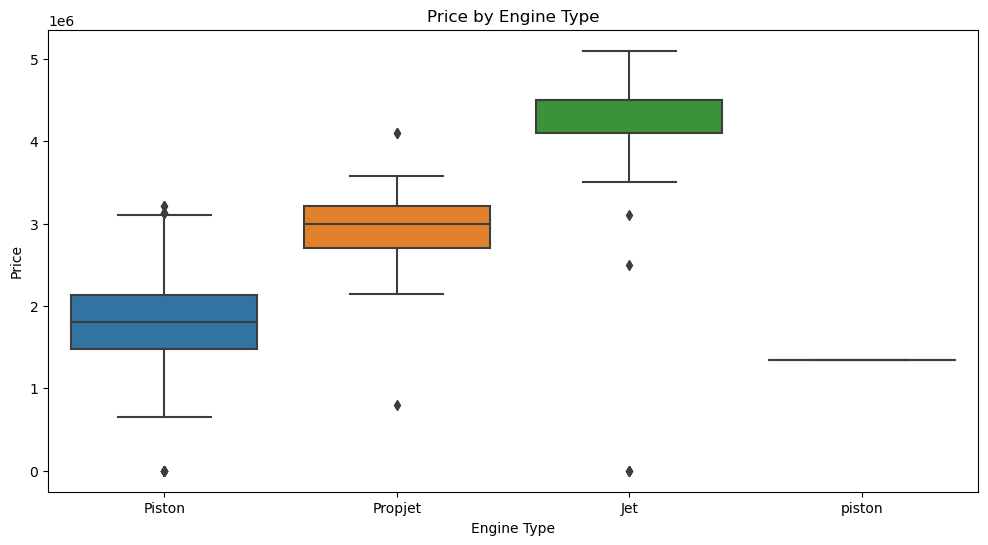

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine Type', y='Price', data=df)

plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Price by Engine Type')

plt.show()

In [53]:
raw_data.describe()


,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.00000,517.000000,517.000000,5.170000e+02
mean,865.576402,202.029014,196.909091,59.031915,1419.379110,1647.704062,1961.270793,1659.007737,7478.477756,4372.983172,38.11499,39.089594,886.624758,2.316974e+06
std,1784.407791,118.504641,106.910822,19.331799,4278.320773,1268.237946,1208.311027,804.499009,10293.312628,5652.272984,137.64575,9.082723,715.543358,1.060090e+06
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
25%,200.000000,132.000000,130.000000,50.000000,50.000000,920.000000,1275.000000,1200.000000,2600.000000,1575.000000,25.10000,35.000000,503.000000,1.580000e+06
50%,285.000000,174.000000,167.000000,55.000000,89.000000,1200.000000,1675.000000,1500.000000,3600.000000,2278.000000,28.10000,36.200000,687.000000,2.000000e+06
75%,550.000000,236.000000,229.000000,73.000000,335.000000,1820.000000,2280.000000,2110.000000,8800.000000,5164.000000,35.60000,42.110000,1100.000000,2.940000e+06
max,14750.000000,530.000000,511.000000,115.000000,41000.000000,7220.000000,6400.000000,4850.000000,89400.000000,46800.000000,3150.00000,93.600000,6500.000000,5.100000e+06


In [54]:
from sklearn.preprocessing import LabelEncoder
cat_data = raw_data.select_dtypes(include = 'object')
num_data = raw_data.select_dtypes(exclude = 'object')
#Replace words with numbers so that analyses can be performed.
for i in cat_data.columns:
    cat_data[i] = LabelEncoder().fit_transform(cat_data[i])

raw_data = pd.concat([cat_data, num_data], axis = 1)
raw_data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0,1,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.3,37.5,370.0,1300000.0
1,100,1,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.7,36.1,190.0,1230000.0
2,0,1,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.5,35.0,210.0,1600000.0
3,99,1,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.5,35.0,210.0,1300000.0
4,0,1,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.5,35.0,175.0,1250000.0


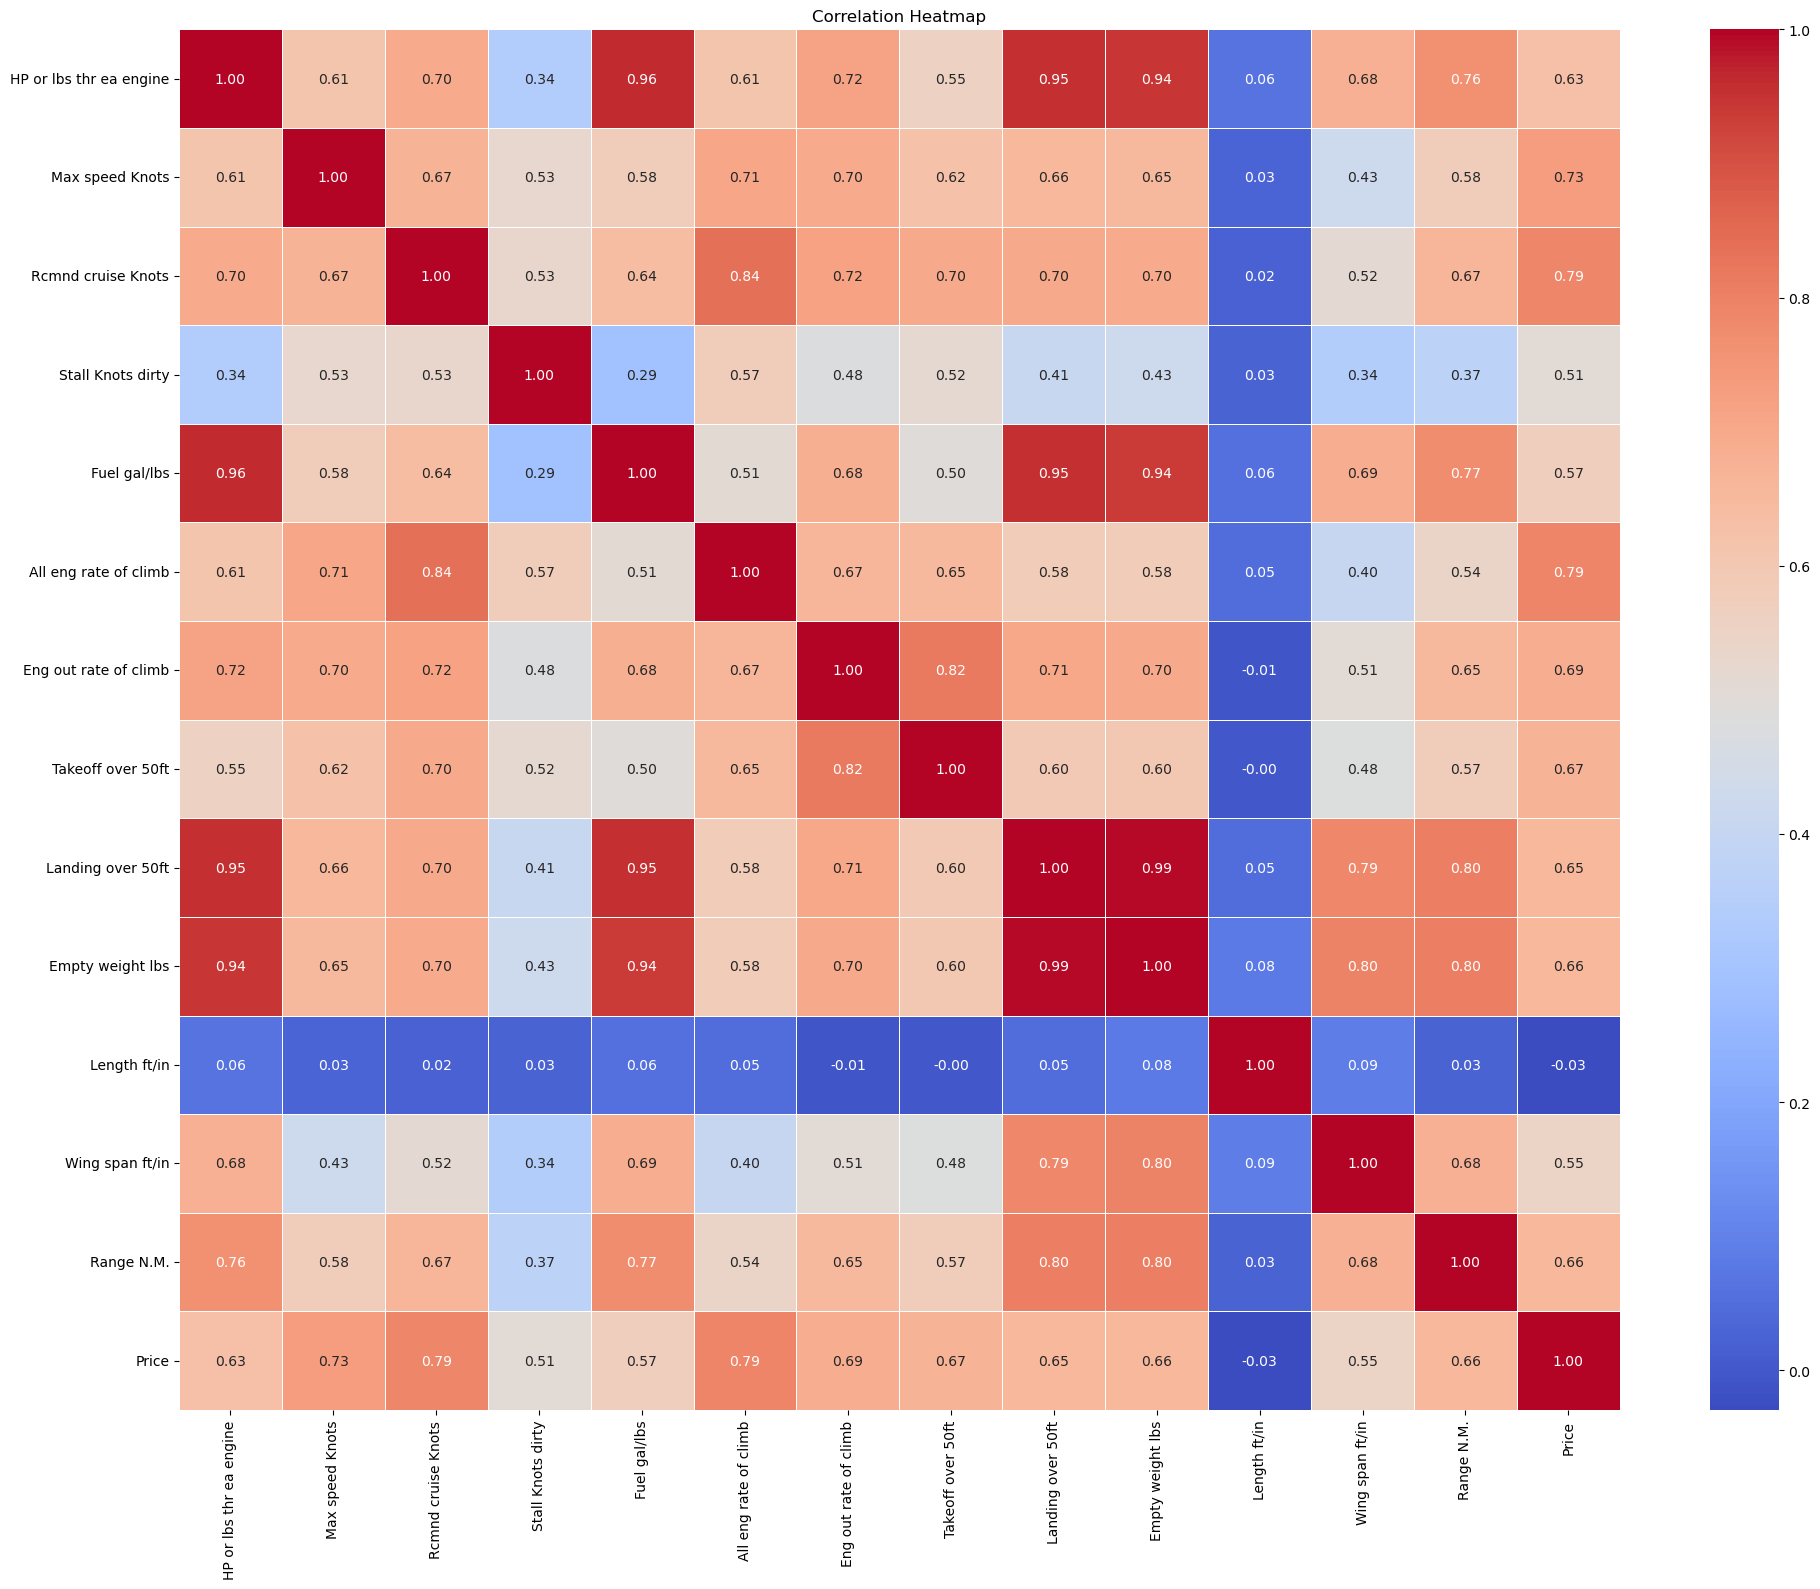

In [55]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(raw_data.drop(['Model Name', 'Engine Type'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [56]:
num = []
cat = []

for i in raw_data.columns:
    if pd.api.types.is_numeric_dtype(raw_data[i]):
        num.append(i)
    else:
        if pd.api.types.is_object_dtype(raw_data[i]):
            cat.append(i)

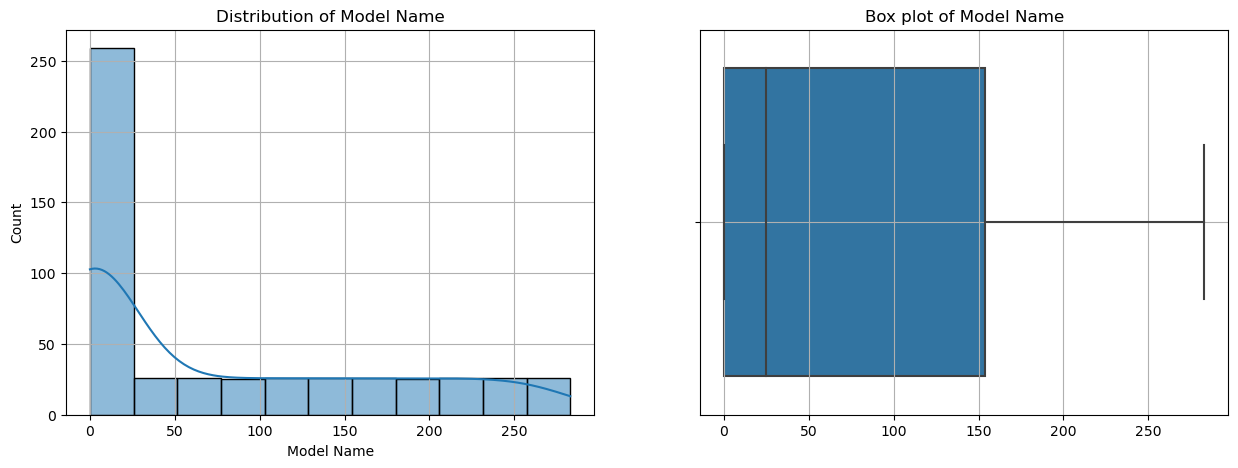

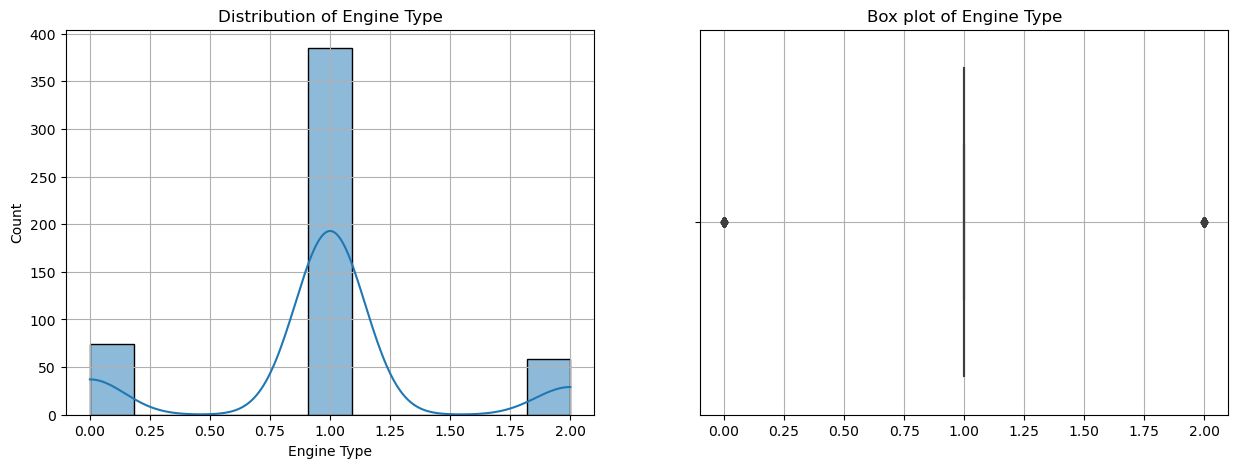

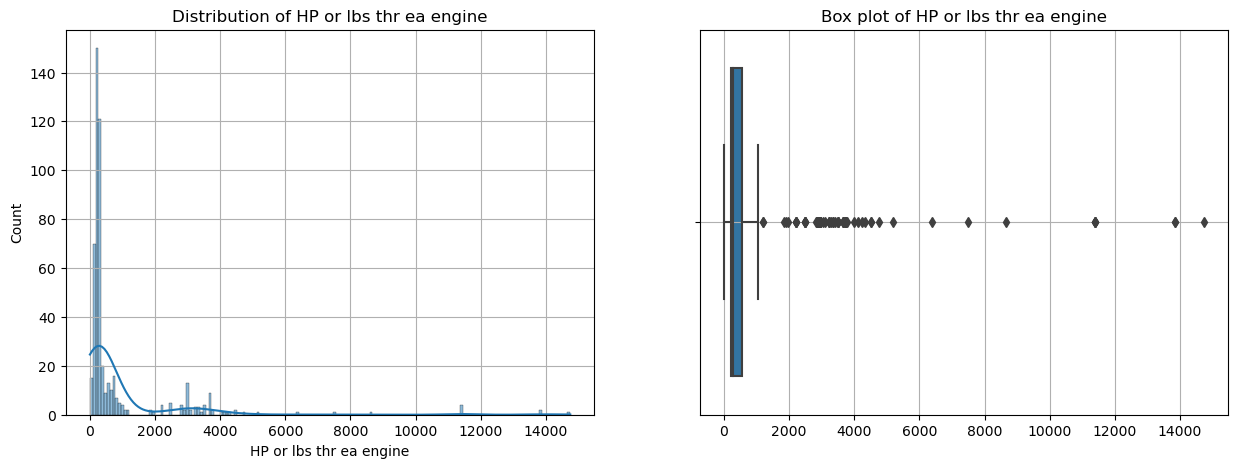

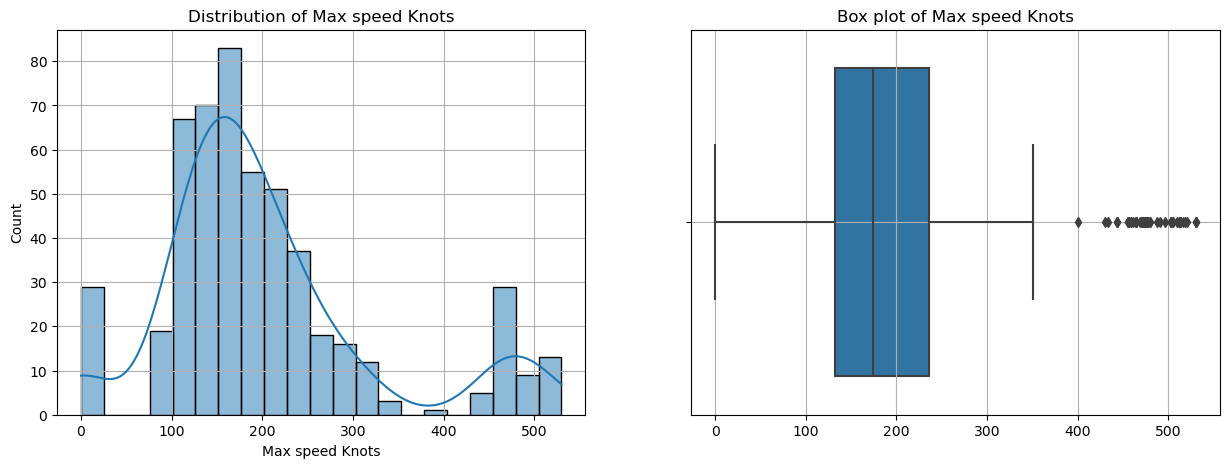

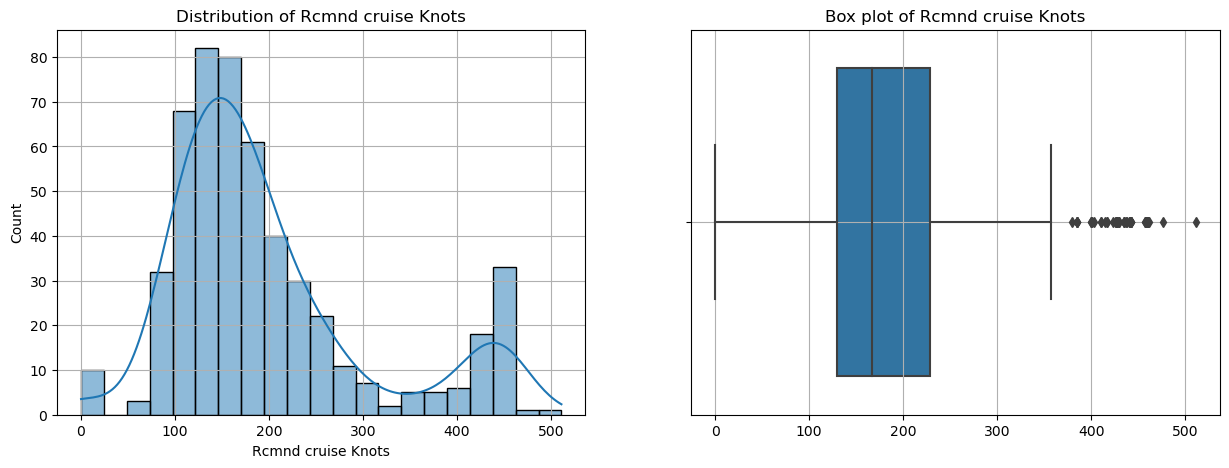

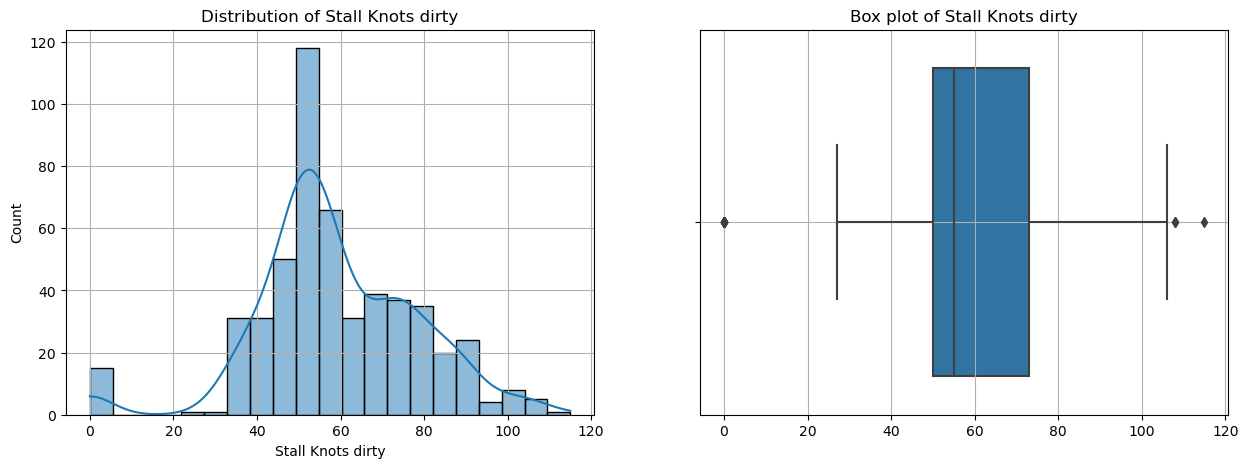

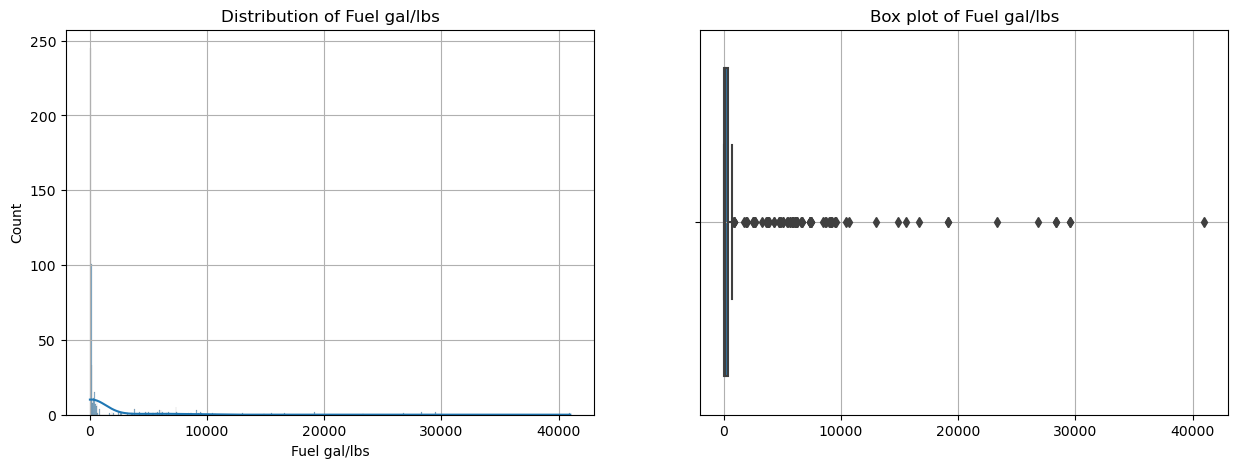

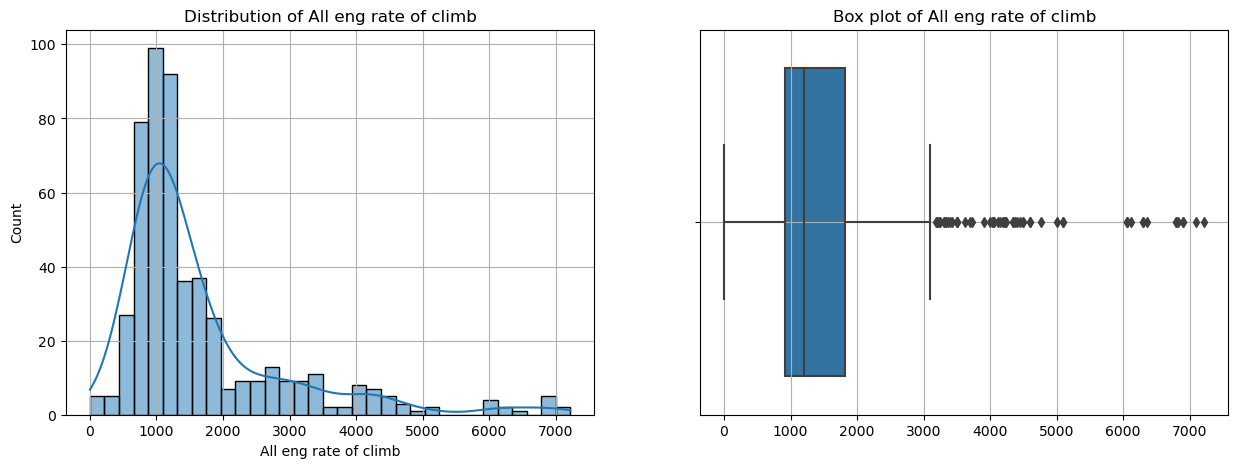

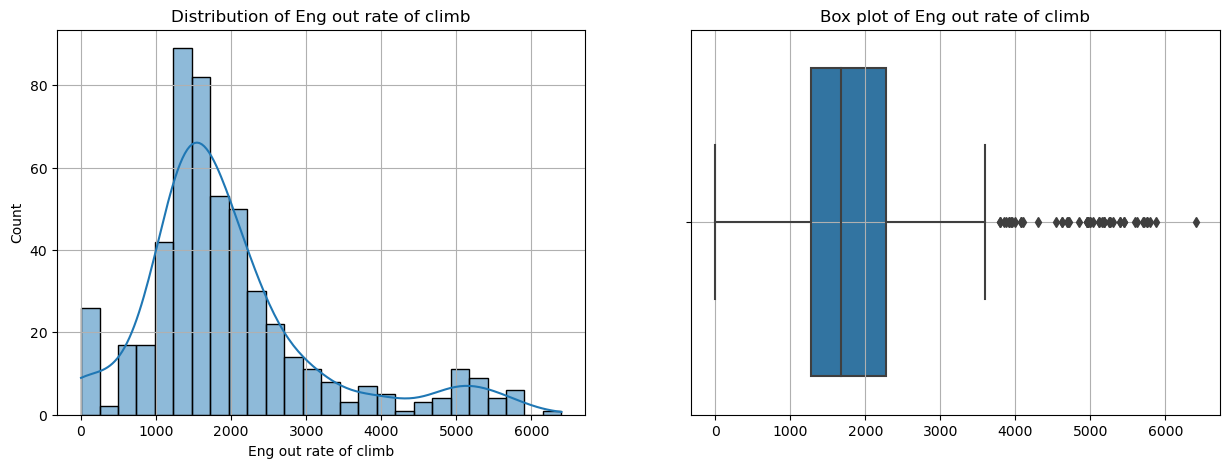

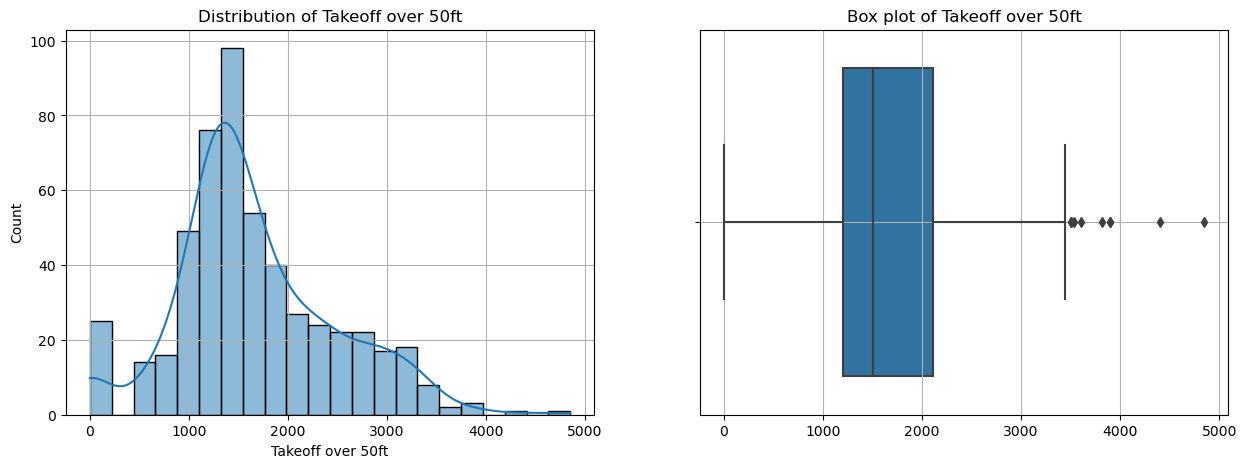

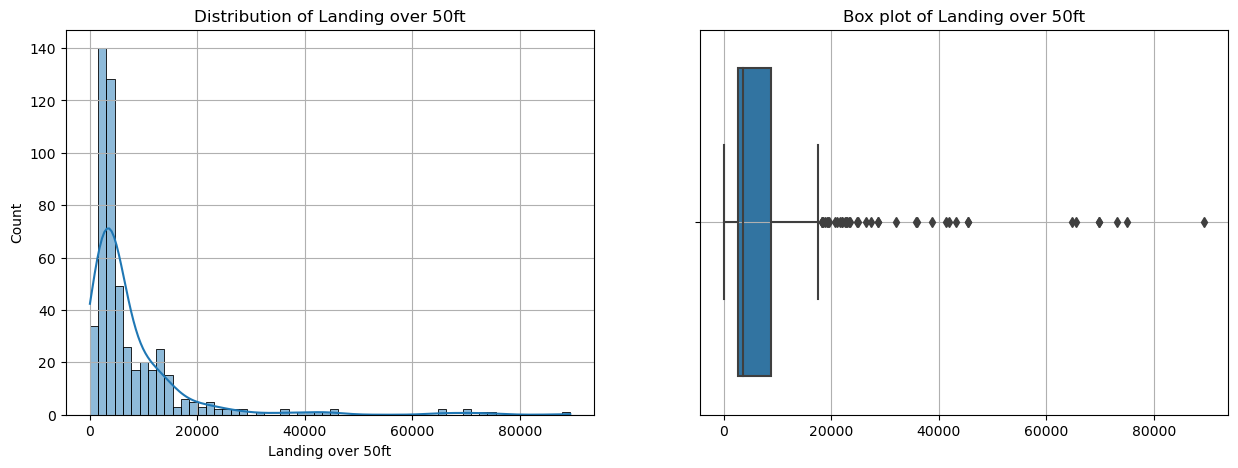

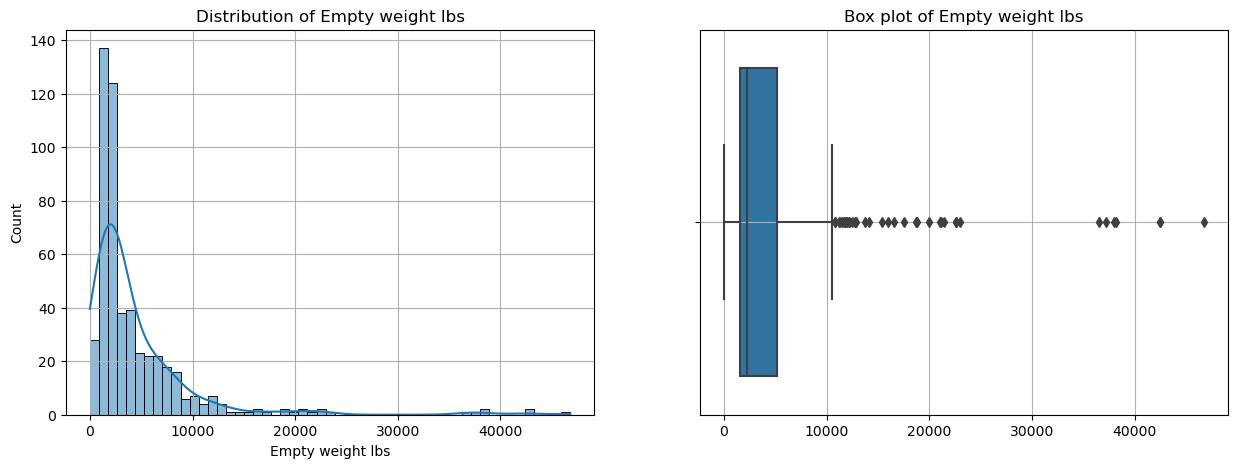

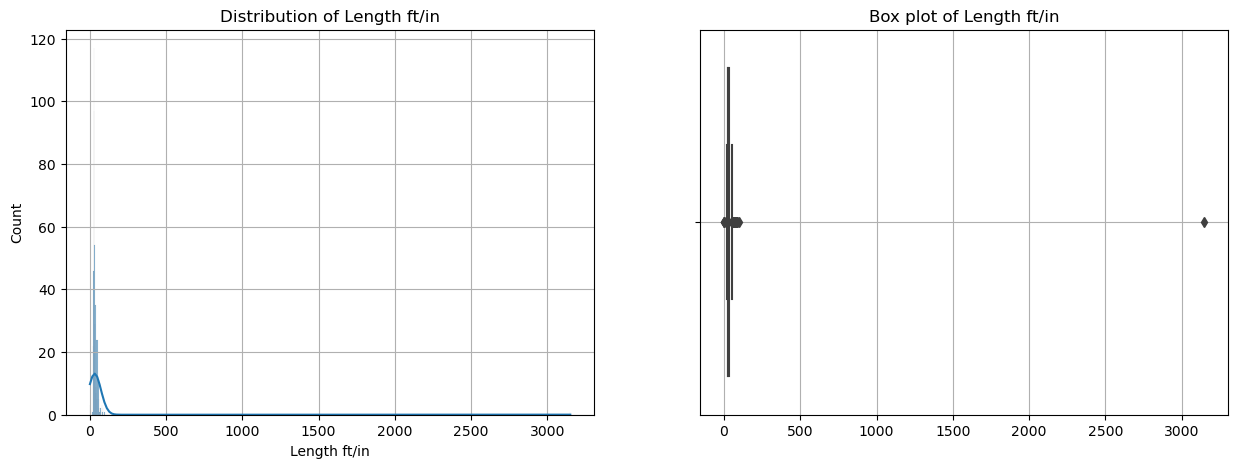

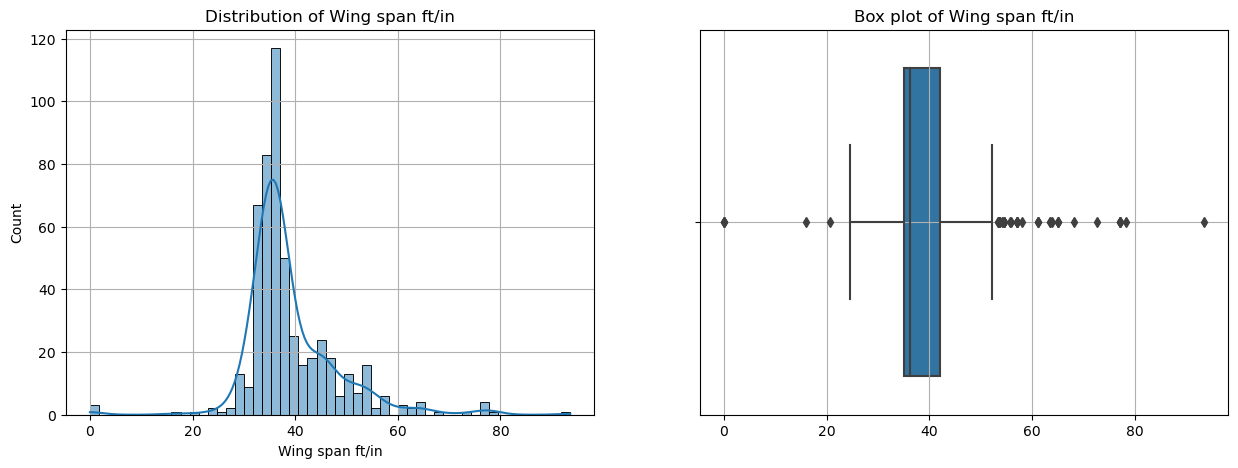

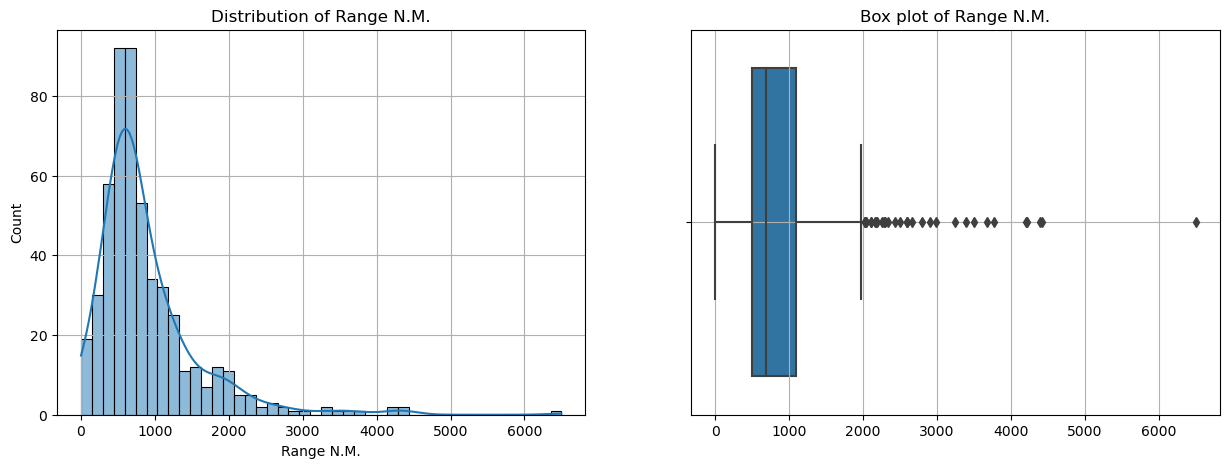

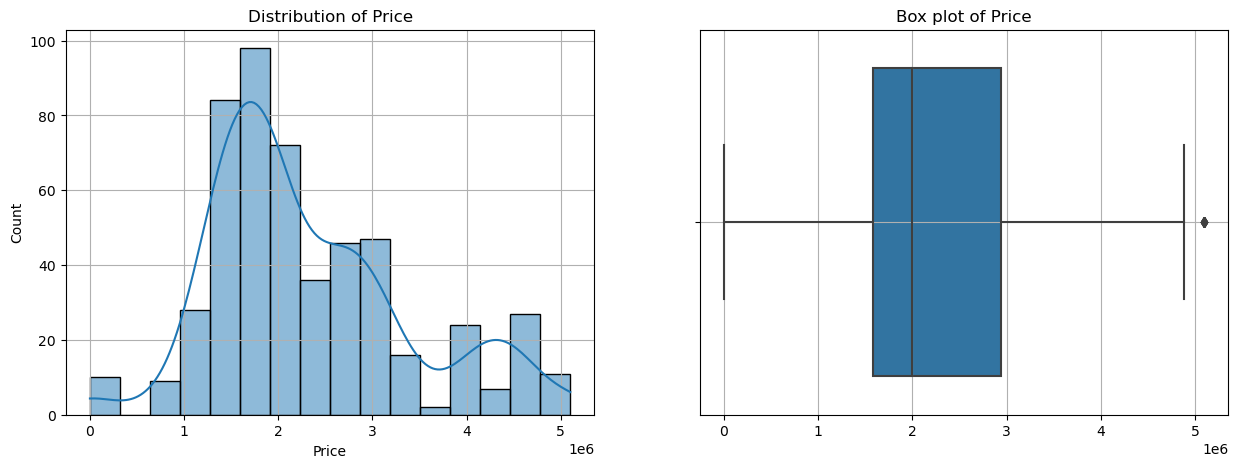

In [57]:
for i in num:
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(raw_data[i],kde=True,ax=axes[0])
    axes[0].set_title(f"Distribution of {i}")
    axes[0].grid(True)
    axes[1].set_xlabel('')
    sns.boxplot(x=raw_data[i],ax=axes[1])
    axes[1].set_title(f"Box plot of {i}")
    axes[1].grid(True)
    axes[1].set_xlabel("")

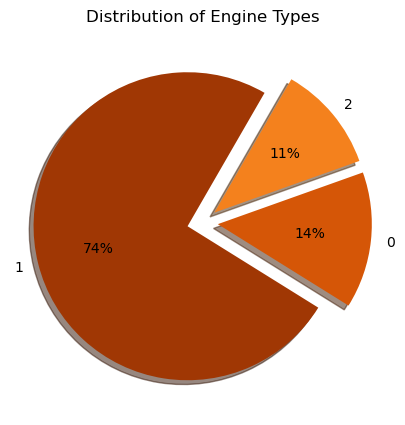

In [58]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlOrBr_r")
size = raw_data["Engine Type"].value_counts()

plt.pie(data = size,\
        x=size.values, labels = size.index, \
        explode=(0.1,0.1,0.1), autopct='%1.0f%%', \
        shadow=True, colors=color_palette, startangle = 60)
plt.title("Distribution of Engine Types")
plt.show()

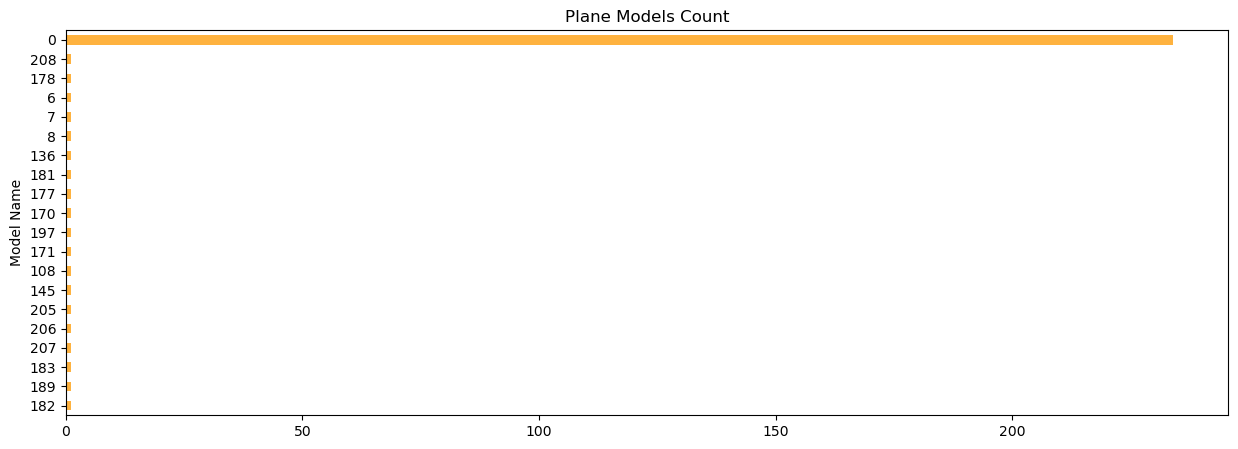

In [59]:
plt.figure(figsize=(15,5))

raw_data["Model Name"].value_counts().head(20).sort_values(ascending=True)\
.plot(kind="barh", color=sns.color_palette("YlOrBr")[2])
plt.title("Plane Models Count")

plt.show()

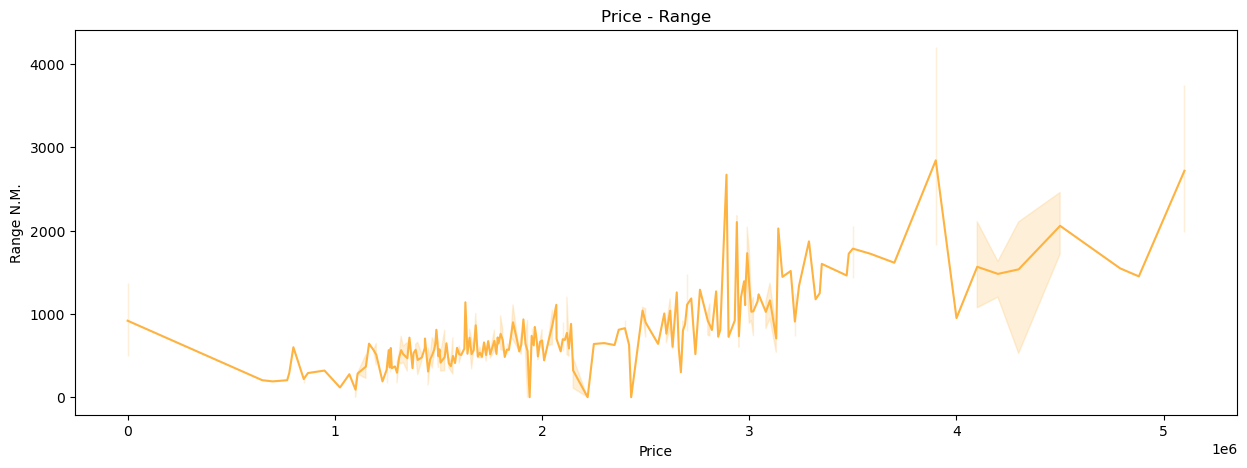

In [60]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_data, x="Price", y="Range N.M.", color=sns.color_palette("YlOrBr")[2])
plt.title("Price - Range")
plt.show()

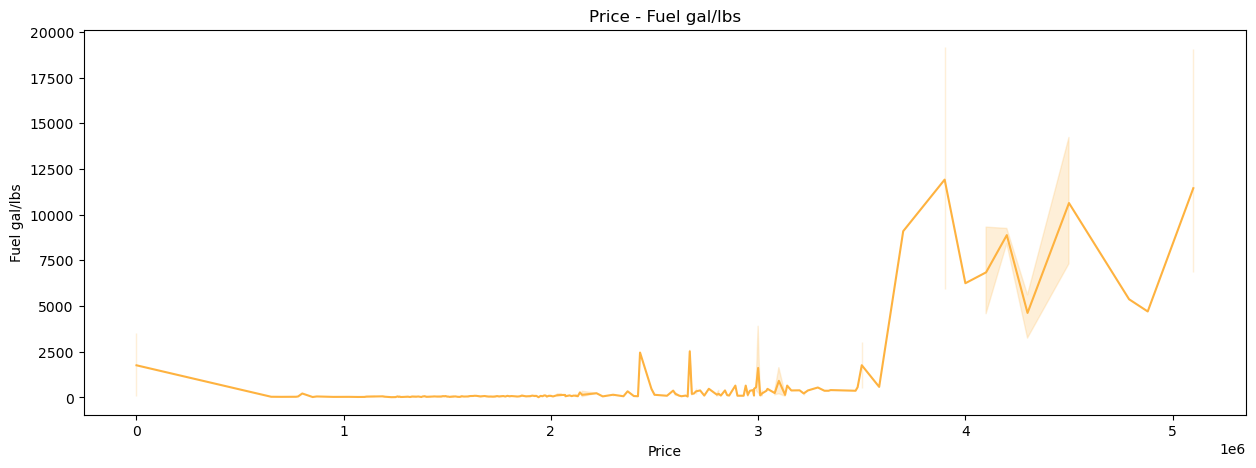

In [61]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_data, x="Price", y="Fuel gal/lbs", color=sns.color_palette("YlOrBr")[2])
plt.title("Price - Fuel gal/lbs")
plt.show()

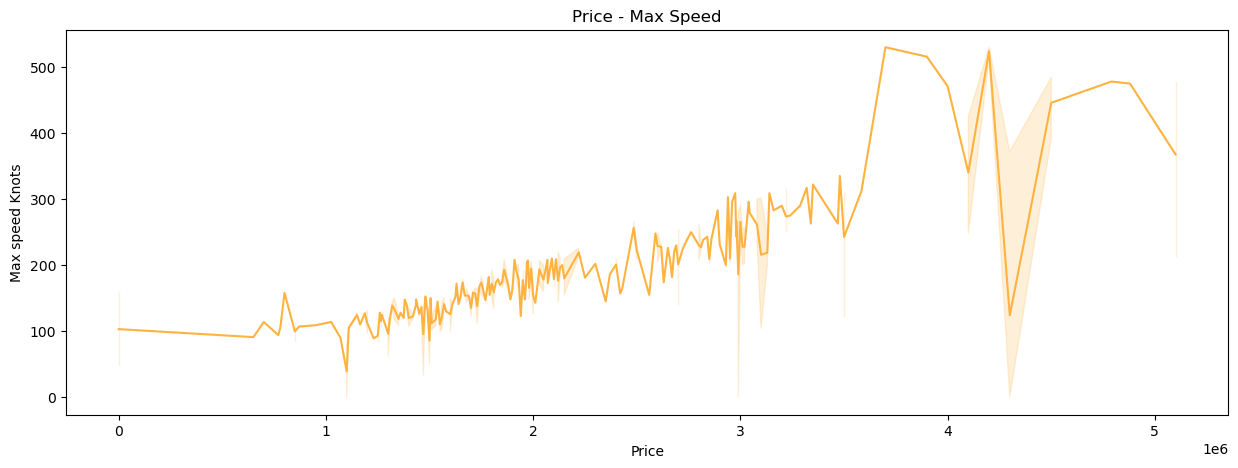

In [62]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_data, x="Price", y="Max speed Knots", color=sns.color_palette("YlOrBr")[2])
plt.title("Price - Max Speed")
plt.show()

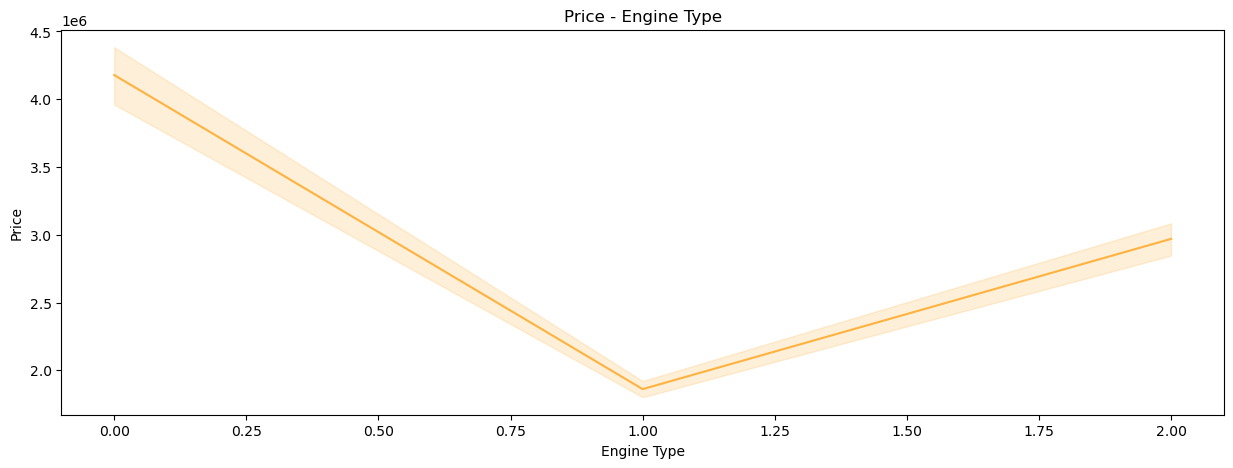

In [63]:
plt.figure(figsize=(15,5))
sns.lineplot(data=raw_data, x="Engine Type", y="Price", color=sns.color_palette("YlOrBr")[2])
plt.title("Price - Engine Type")
plt.show()

<h1>Regression model to predict the price</h1>

In [64]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.3,37.5,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.7,36.1,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.5,35.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.5,35.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.5,35.0,175.0,1250000.0


<h3>finding relation between price and other attributes</h3>

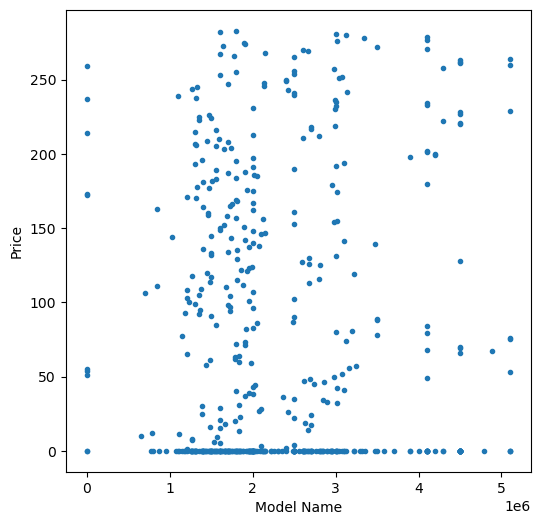

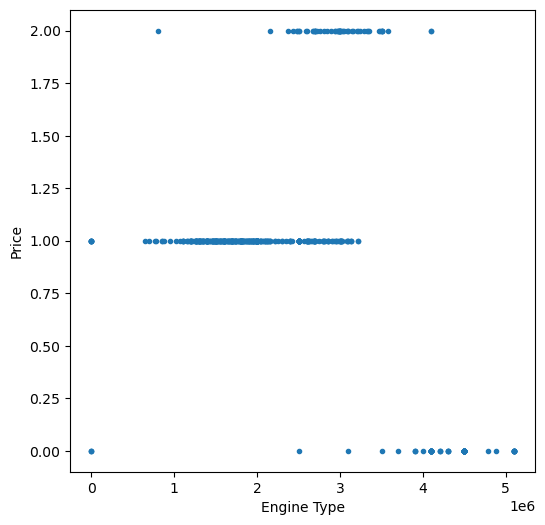

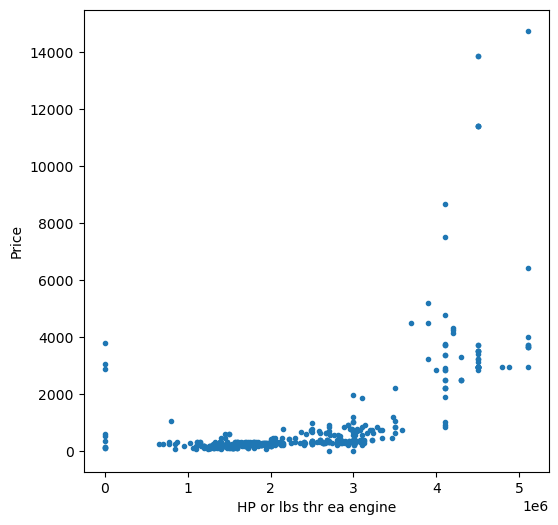

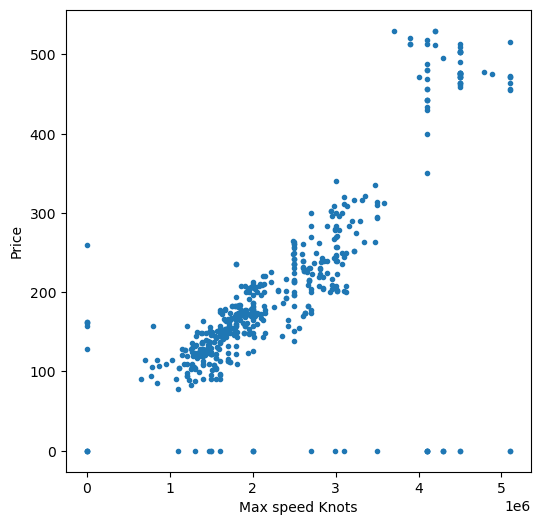

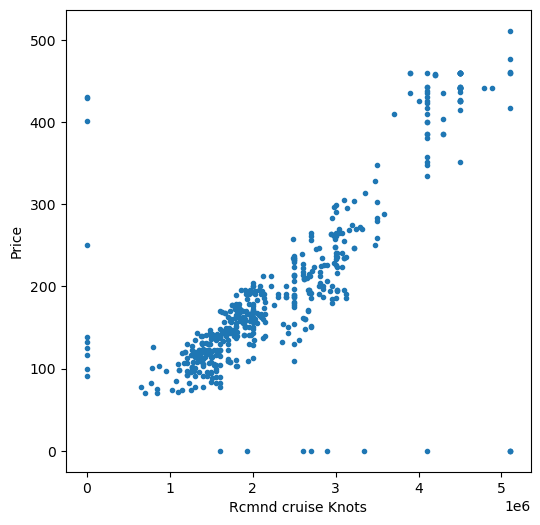

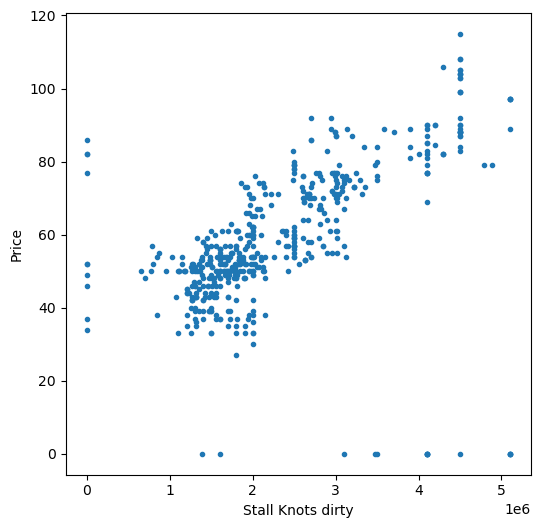

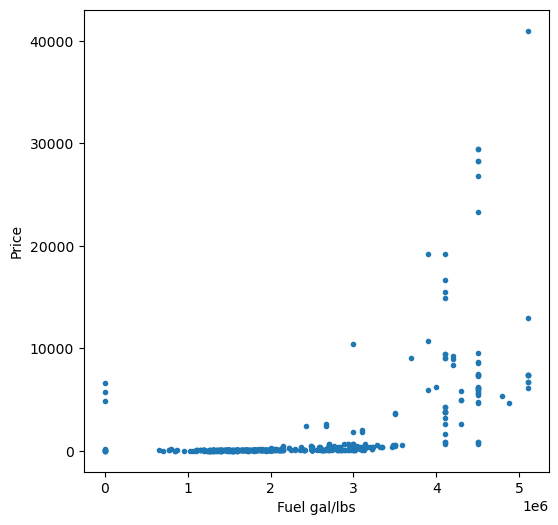

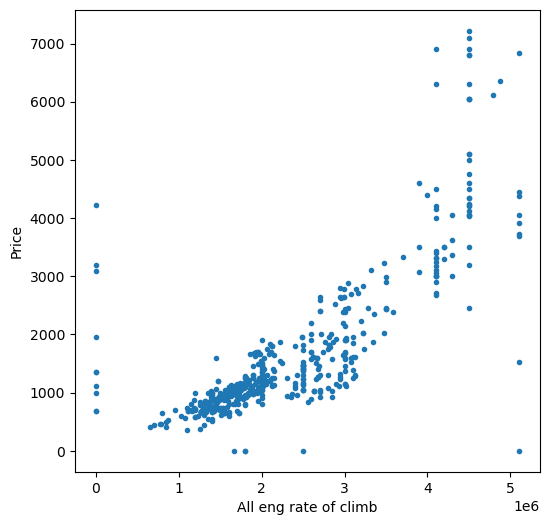

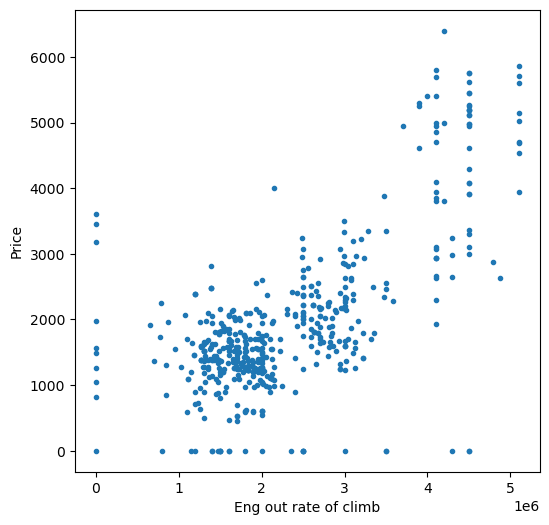

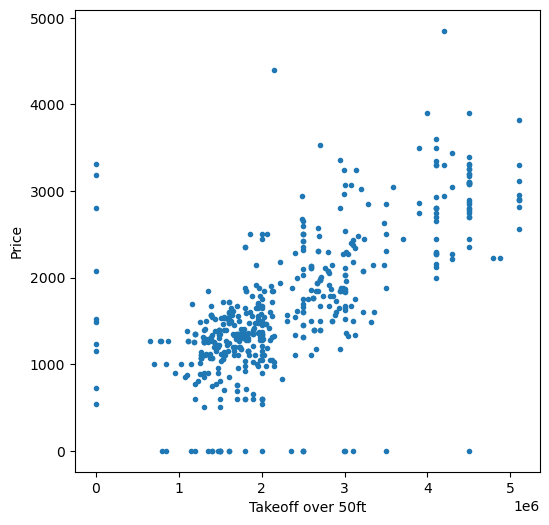

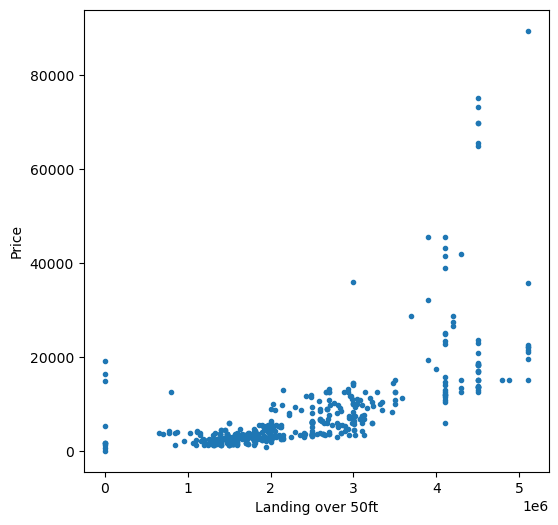

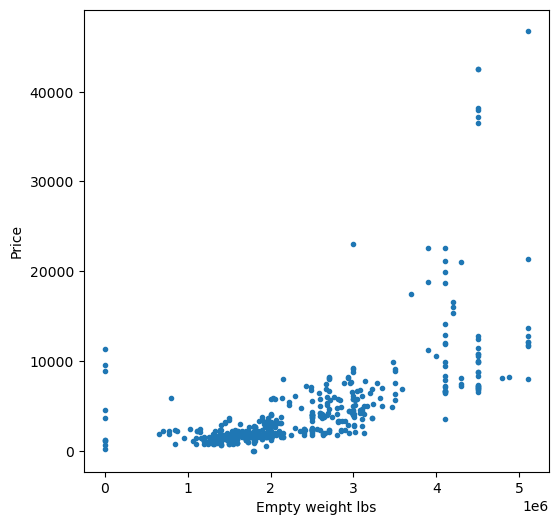

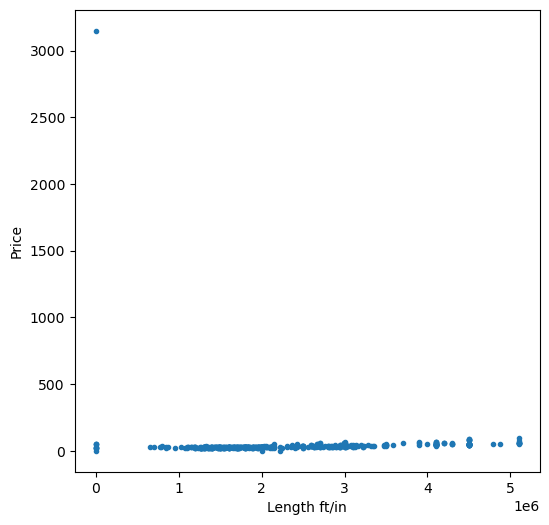

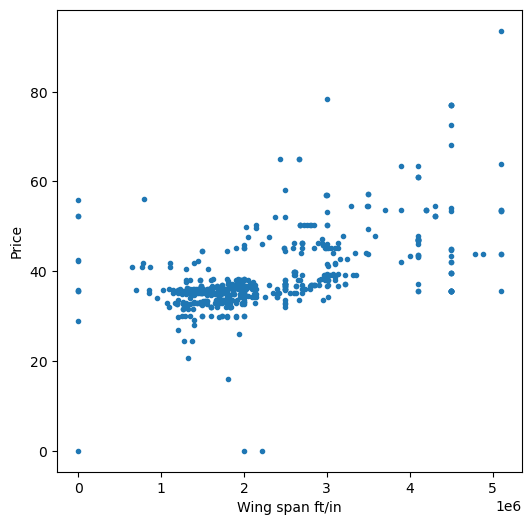

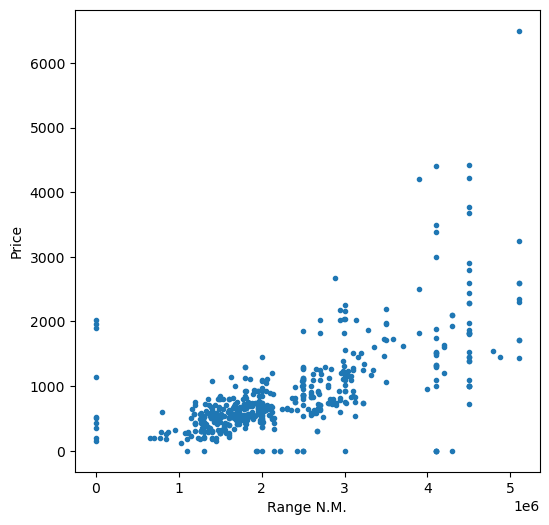

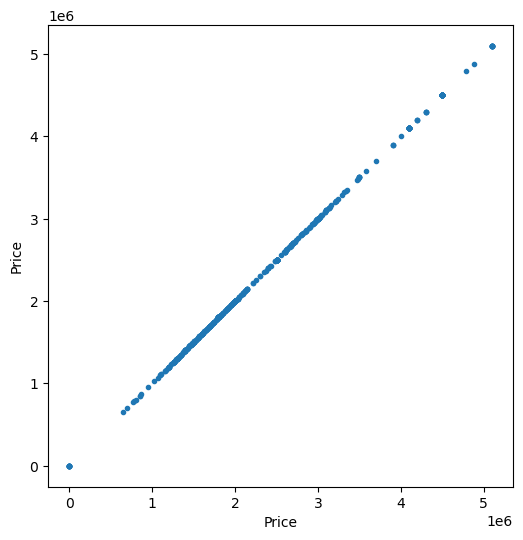

In [65]:
figures = []
for column in raw_data:
    f = plt.figure(figsize=(6,6))
    figures += [f]  # This appends a figure f to the list of figures
    ax = plt.axes()
    ax.plot(raw_data['Price'], raw_data[column], marker = 'o', ls='', ms = 3.0)
    plt.xlabel(f'{column}')
    plt.ylabel('Price')
    

In [66]:
X = raw_data.iloc[:, :-1].values
y = raw_data.iloc[:, -1].values

In [67]:
raw_data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0,1,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.3,37.5,370.0,1300000.0
1,100,1,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.7,36.1,190.0,1230000.0
2,0,1,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.5,35.0,210.0,1600000.0
3,99,1,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.5,35.0,210.0,1300000.0
4,0,1,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.5,35.0,175.0,1250000.0


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =250)


In [70]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = regressor.predict(X_test)

<h1>Compare predicted value with actual</h1>

In [72]:
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[2981666.61, 3045000.  ],
       [3727948.45,       0.  ],
       [1824016.71, 2500000.  ],
       [1722272.04,       0.  ],
       [2548414.71, 3010000.  ],
       [1982651.13, 2000000.  ],
       [2063169.39, 2850000.  ],
       [2550342.59, 2800000.  ],
       [1854364.59, 2000000.  ],
       [1864674.76, 1830000.  ],
       [1443178.21,  950000.  ],
       [1864146.02, 1600000.  ],
       [3602791.23, 4100000.  ],
       [1571481.19, 1700000.  ],
       [1366794.79, 2000000.  ],
       [1270483.76, 1810000.  ],
       [2538235.54, 2500000.  ],
       [1728184.46, 1435000.  ],
       [4593918.93, 5100000.  ],
       [1550262.43, 1550000.  ],
       [1776346.84, 1600000.  ],
       [1736660.33, 1480000.  ],
       [1628962.38, 1700000.  ],
       [2229320.24, 2930000.  ],
       [2293416.66, 1975000.  ],
       [4706711.  , 4500000.  ],
       [2033777.12, 2500000.  ],
       [1534968.82, 1800000.  ],
       [2102689.02, 2400000.  ],
       [1683599.76, 1330000.  ],
       [18

In [73]:
result.tolist
Diff=[]
for i in range(len(result)):
    a=result[i]
    b=a[1]-a[0]
    Diff.append(b)
Diff

[63333.38837240171,
 -3727948.4531618804,
 675983.2919513141,
 -1722272.0375568653,
 461585.2906299699,
 17348.865396673093,
 786830.6075638896,
 249657.40515541472,
 145635.41258818842,
 -34674.76466750889,
 -493178.20535906544,
 -264146.0220091543,
 497208.7743829759,
 128518.81372620724,
 633205.211350163,
 539516.2379148807,
 -38235.5365585899,
 -293184.45607067575,
 506081.06578462105,
 -262.4322251761332,
 -176346.83929199143,
 -256660.3289078537,
 71037.61788732,
 700679.7567184288,
 -318416.6570995953,
 -206710.99635824282,
 466222.882421596,
 265031.18105000607,
 297310.97696402017,
 -353599.76129940106,
 -414940.2944493217,
 -186313.85982677503,
 58947.87414516555,
 -348892.46660555527,
 -211809.98934476124,
 -331268.0220668246,
 188437.89847407397,
 410679.18043632526,
 39328.574343547225,
 201955.8096529164,
 117020.00637404434,
 -183632.33165162848,
 878977.8160660814,
 -140611.53971499903,
 12315.965117405169,
 134980.03547150106,
 -314268.61046468024,
 -37227.17002687766